# Project description

we work for the OilyGiant mining company. Our task is to find the best place for a new well.

Steps to choose the location:
- Collect the oil well parameters in the selected region: oil quality and volume of reserves;
- Build a model for predicting the volume of reserves in the new wells;
- Pick the oil wells with the highest estimated values;
- Pick the region with the highest total profit for the selected oil wells.

we have data on oil samples from three regions. Parameters of each oil well in the region are already known. Build a model that will help to pick the region with the highest profit margin. Analyze potential profit and risks using the Bootstrapping technique.

## Data description

Geological exploration data for three different regions with the following variables:

- id — unique oil well identifier
- f0, f1, f2 — three features of points (their specific meaning is unimportant, but the features themselves are significant)
- product — volume of reserves in the oil well (thousand barrels).


## Conditions:

- Only linear regression is suitable for model training (the rest are not sufficiently predictable).
- When exploring the region, a study of 500 points is carried with picking the best 200 points for the profit calculation.
- The budget for development of 200 oil wells is 100 USD million.
- One barrel of raw materials brings 4.5 USD of revenue The revenue from one unit of product is 4,500 dollars (volume of reserves is in thousand barrels).
- After the risk evaluation, keep only the regions with the risk of losses lower than 2.5%. From the ones that fit the criteria, the region with the highest average profit should be selected.
- The data is synthetic: contract details and well characteristics are not disclosed.

In [2]:
import pandas as pd
import numpy as np
from scipy.stats import skew, kurtosis, shapiro
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [3]:
try:
    df_geo_1 = pd.read_csv('geo_data_0.csv', sep=',')

except FileNotFoundError:
    df_geo_1 = pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/datasets/geo_data_0.csv', sep=',')


try:
    df_geo_2 = pd.read_csv('geo_data_1.csv', sep=',')

except FileNotFoundError:
    df_geo_2 = pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/datasets/geo_data_1.csv', sep=',')


try:
    df_geo_3 = pd.read_csv('geo_data_2.csv', sep=',')

except FileNotFoundError:
    df_geo_3 = pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/datasets/geo_data_2.csv', sep=',')

In [4]:
df_geo_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [5]:
df_geo_1.shape

(100000, 5)

In [6]:
duplicate_ids_1 = df_geo_1[df_geo_1.duplicated('id')]
print(duplicate_ids_1)

          id        f0        f1         f2     product
7530   HZww2  1.061194 -0.373969  10.430210  158.828695
41724  bxg6G -0.823752  0.546319   3.630479   93.007798
51970  A5aEY -0.180335  0.935548  -2.094773   33.020205
63593  QcMuo  0.635635 -0.473422   0.862670   64.578675
66136  74z30  1.084962 -0.312358   6.990771  127.643327
69163  AGS9W -0.933795  0.116194  -3.655896   19.230453
75715  Tdehs  0.112079  0.430296   3.218993   60.964018
90815  fiKDv  0.049883  0.841313   6.394613  137.346586
92341  TtcGQ  0.110711  1.022689   0.911381  101.318008
97785  bsk9y  0.378429  0.005837   0.160827  160.637302


In [7]:
df_geo_1.duplicated('id').sum()

10

In [8]:
duplicate_ids_2 = df_geo_2[df_geo_2.duplicated('id')]
print(duplicate_ids_2)

          id         f0        f1        f2     product
41906  LHZR0  -8.989672 -4.286607  2.009139   57.085625
82178  bfPNe  -6.202799 -4.820045  2.995107   84.038886
82873  wt4Uk  10.259972 -9.376355  4.994297  134.766305
84461  5ltQ6  18.213839  2.191999  3.993869  107.813044


In [9]:
df_geo_2.duplicated('id').sum()

4

In [10]:
duplicate_ids_3 = df_geo_3[df_geo_3.duplicated('id')]
print(duplicate_ids_3)

          id        f0        f1        f2     product
43233  xCHr8 -0.847066  2.101796  5.597130  184.388641
49564  VF7Jo -0.883115  0.560537  0.723601  136.233420
55967  KUPhW  1.211150  3.176408  5.543540  132.831802
95090  Vcm5J  2.587702  1.986875  2.482245   92.327572


In [11]:
df_geo_3.duplicated('id').sum()

4

In [12]:
df_geo_1.drop_duplicates(subset=['id'], inplace=True)
df_geo_2.drop_duplicates(subset=['id'], inplace=True)
df_geo_3.drop_duplicates(subset=['id'], inplace=True)

In [13]:
df_geo_1.shape

(99990, 5)

In [14]:
df_geo_2.shape

(99996, 5)

In [15]:
df_geo_3.shape

(99996, 5)

In [16]:
# Drop the id column
df_geo_1.drop('id', axis=1, inplace=True)
df_geo_2.drop('id', axis=1, inplace=True)
df_geo_3.drop('id', axis=1, inplace=True)

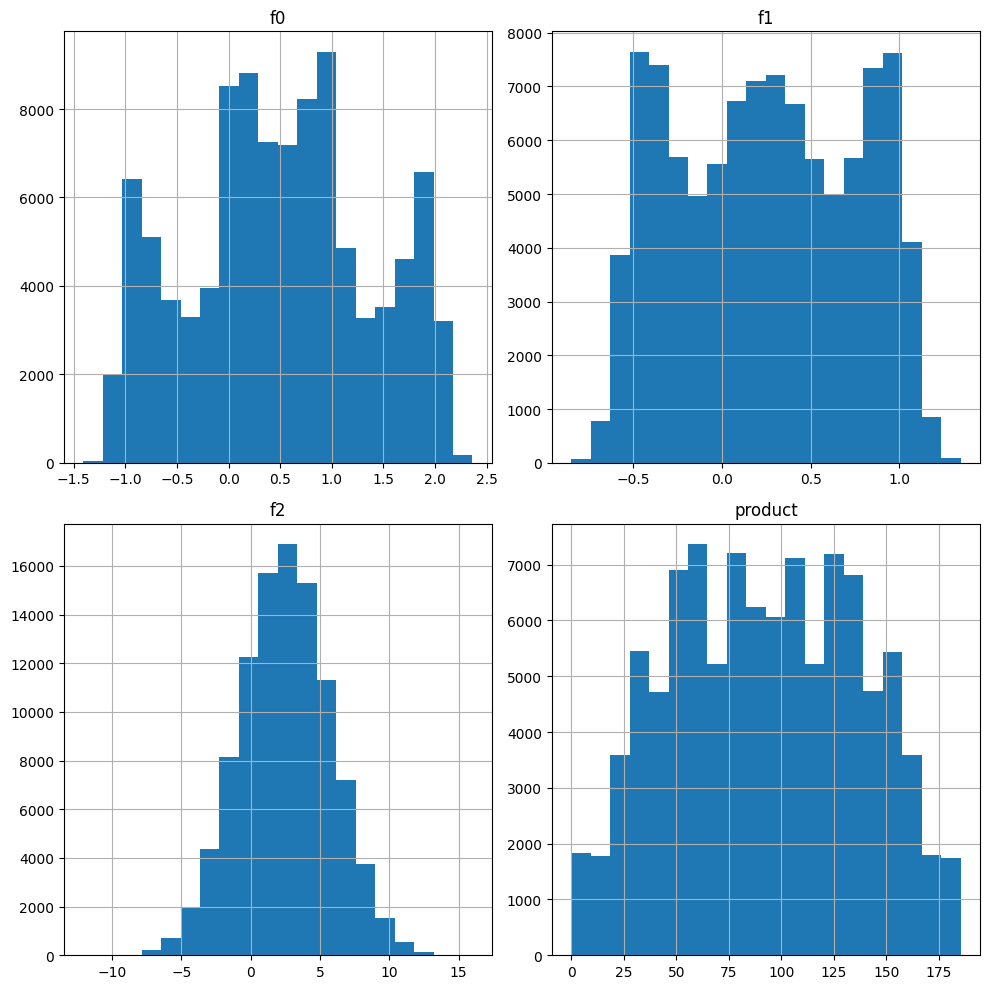

In [17]:
df_geo_1.hist(bins=20, figsize=(10,10))
plt.tight_layout()
plt.show()

In [18]:
# Calculate central tendency and spread
mean1_f0 = df_geo_1['f0'].mean()
median1_f0 = df_geo_1['f0'].median()
std1_f0 = df_geo_1['f0'].std()
skew1_f0 = skew(df_geo_1['f0'])


mean1_f1 = df_geo_1['f1'].mean()
median1_f1 = df_geo_1['f1'].median()
std1_f1 = df_geo_1['f1'].std()
skew1_f1 = skew(df_geo_1['f1'])


mean1_f2 = df_geo_1['f2'].mean()
median1_f2 = df_geo_1['f2'].median()
std1_f2 = df_geo_1['f2'].std()
skew1_f2 = skew(df_geo_1['f2'])


mean1_product = df_geo_1['product'].mean()
median1_product = df_geo_1['product'].median()
std1_product = df_geo_1['product'].std()
skew1_product = skew(df_geo_1['product'])


print(f"f0: Mean={mean1_f0}, Median={median1_f0}, Std={std1_f0}, Skewness={skew1_f0}")
print(f"f1: Mean={mean1_f1}, Median={median1_f1}, Std={std1_f1}, Skewness={skew1_f1}")
print(f"f2: Mean={mean1_f2}, Median={median1_f2}, Std={std1_f2}, Skewness={skew1_f2}")
print(f"product: Mean={mean1_product}, Median={median1_product}, Std={std1_product}, Skewness={skew1_product}")

f0: Mean=0.5004544259880562, Median=0.5024054255613645, Std=0.8718442347826002, Skewness=-0.00037589552424751037
f1: Mean=0.2501406576124108, Median=0.25025228798345783, Std=0.5044297097274029, Skewness=0.0007148369404845593
f2: Mean=2.5026287103810834, Median=2.5159691067559757, Std=3.248148844236954, Skewness=-0.0030667258992310422
product: Mean=92.49968421774354, Median=91.84792790724278, Std=44.28830363562306, Skewness=0.004828292045154546


for the first region, while the mean and median values for f0,f1, and f2 varied, the standard deviation and skewness of the product were notably different. The skewness value of the product was positive, indicating a slight skewness to the right. This suggests that the combination of the features resulted in a more spread out distribution with some outliers impacting the overall distribution.

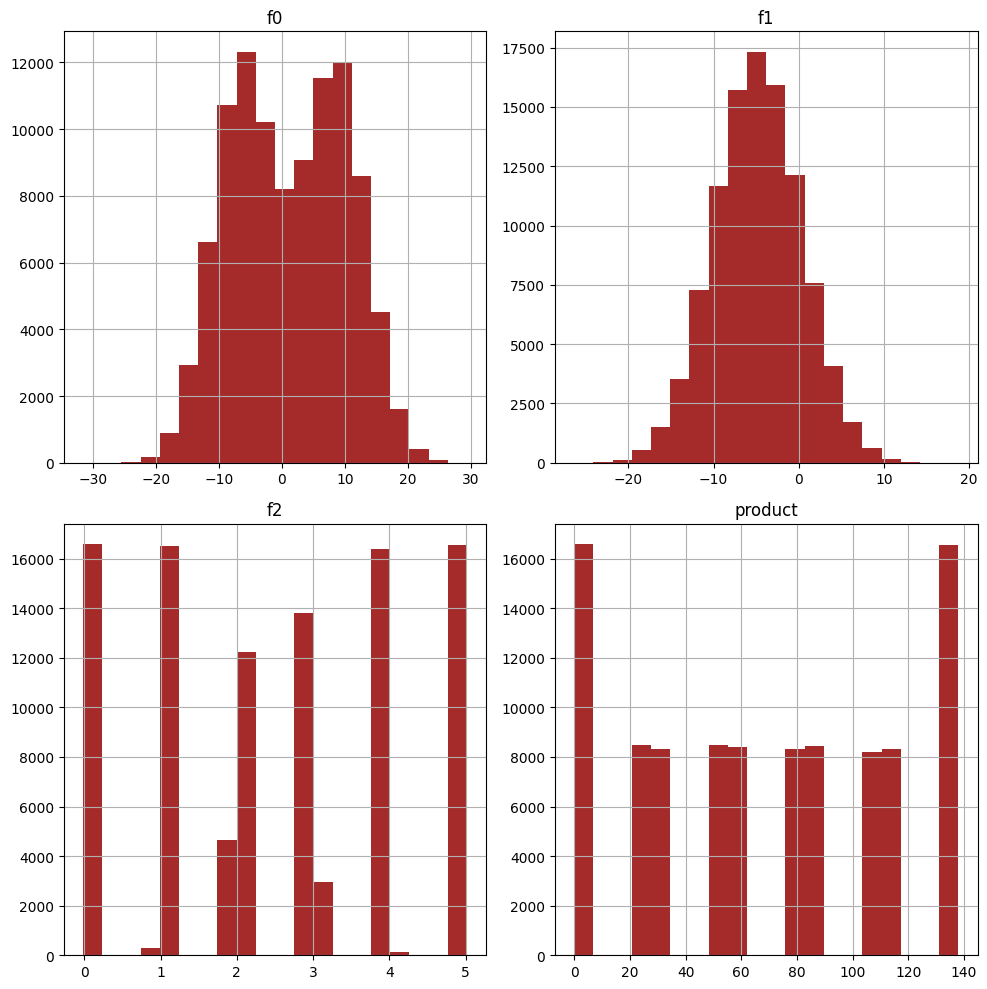

In [19]:
df_geo_2.hist(bins=20, figsize=(10,10), color='brown')
plt.tight_layout()
plt.show()

In [20]:
# Calculate central tendency and spread
mean2_f0 = df_geo_2['f0'].mean()
median2_f0 = df_geo_2['f0'].median()
std2_f0 = df_geo_2['f0'].std()
skew2_f0 = skew(df_geo_2['f0'])

mean2_f1 = df_geo_2['f1'].mean()
median2_f1 = df_geo_2['f1'].median()
std2_f1 = df_geo_2['f1'].std()
skew2_f1 = skew(df_geo_2['f1'])

mean2_f2 = df_geo_2['f2'].mean()
median2_f2 = df_geo_2['f2'].median()
std2_f2 = df_geo_2['f2'].std()
skew2_f2 = skew(df_geo_2['f2'])

mean2_product = df_geo_2['product'].mean()
median2_product = df_geo_2['product'].median()
std2_product = df_geo_2['product'].std()
skew2_product = skew(df_geo_2['product'])



print(f"f0: Mean={mean2_f0}, Median={median2_f0}, Std={std2_f0}, Skewness={skew2_f0}")
print(f"f1: Mean={mean2_f1}, Median={median2_f1}, Std={std2_f1}, Skewness={skew2_f1}")
print(f"f2: Mean={mean2_f2}, Median={median2_f2}, Std={std2_f2}, Skewness={skew2_f2}")
print(f"product: Mean={mean2_product}, Median={median2_product}, Std={std2_product}, Skewness={skew2_product}")

f0: Mean=1.141208670340875, Median=1.1530552313242992, Std=8.965814583490898, Skewness=0.0019618180358189777
f1: Mean=-4.796608103039279, Median=-4.813171838262699, Std=5.119905596124132, Skewness=0.016595555016460324
f2: Mean=2.4945011083052373, Median=2.0114745953222206, Std=1.7035792242838101, Skewness=0.006698184354049067
product: Mean=68.82391591804064, Median=57.08562464628662, Std=45.9446629620274, Skewness=0.00671969528424719


on the second region, f0, f1, and f2 show varying mean values and standard deviations. However, when considering the product of these columns, there is a significant increase in both the mean and standard deviation, indicating a larger spread of data and potentially more variability in the overall dataset.

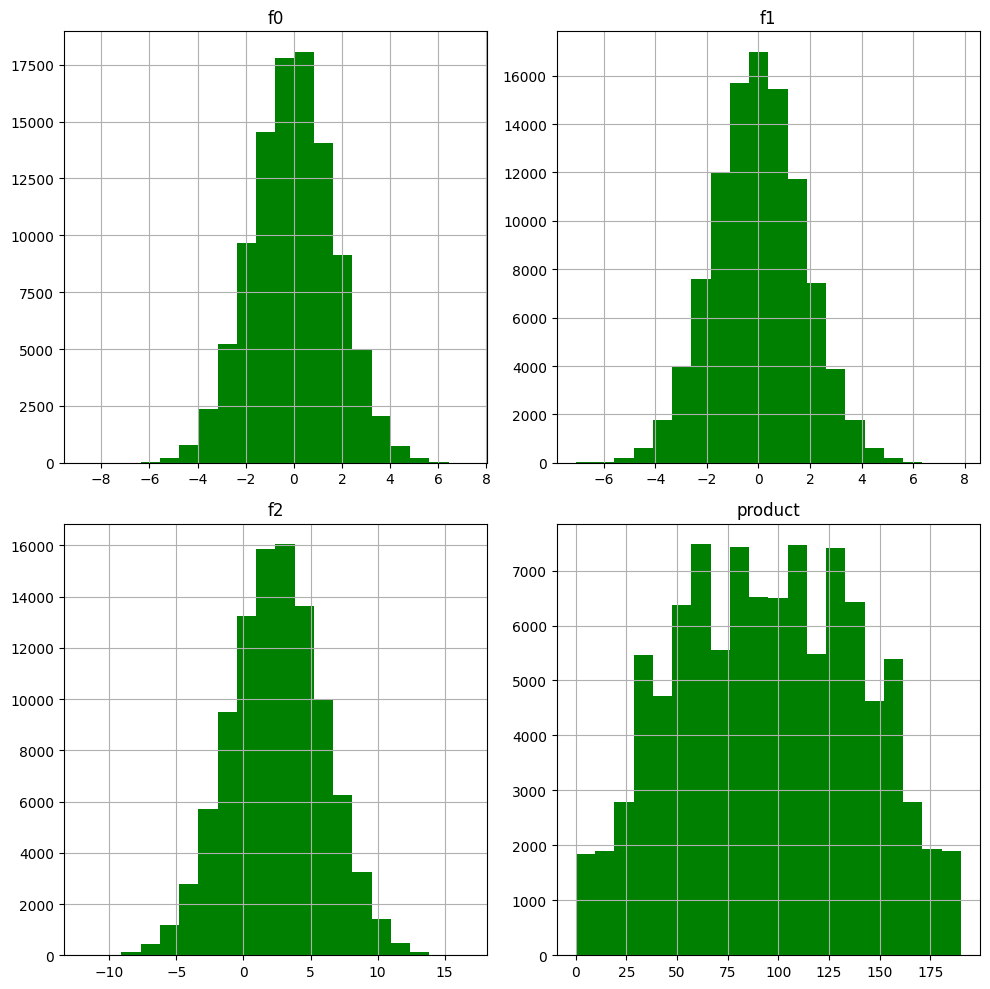

In [21]:
df_geo_3.hist(bins=20, figsize=(10,10), color='green')

plt.tight_layout()
plt.show()

In [22]:
# Calculate central tendency and spread
mean3_f0 = df_geo_3['f0'].mean()
median3_f0 = df_geo_3['f0'].median()
std3_f0 = df_geo_3['f0'].std()
skew3_f0 = skew(df_geo_3['f0'])

mean3_f1 = df_geo_3['f1'].mean()
median3_f1 = df_geo_3['f1'].median()
std3_f1 = df_geo_3['f1'].std()
skew3_f1 = skew(df_geo_3['f1'])

mean3_f2 = df_geo_3['f2'].mean()
median3_f2 = df_geo_3['f2'].median()
std3_f2 = df_geo_3['f2'].std()
skew3_f2 = skew(df_geo_3['f2'])

mean3_product = df_geo_3['product'].mean()
median3_product = df_geo_3['product'].median()
std3_product = df_geo_3['product'].std()
skew3_product = skew(df_geo_3['product'])


print(f"f0: Mean={mean3_f0}, Median={median3_f0}, Std={std3_f0}, Skewness={skew3_f0}")
print(f"f1: Mean={mean3_f1}, Median={median3_f1}, Std={std3_f1}, Skewness={skew3_f1}")
print(f"f2: Mean={mean3_f2}, Median={median3_f2}, Std={std3_f2}, Skewness={skew3_f2}")
print(f"product: Mean={mean3_product}, Median={median3_product}, Std={std3_product}, Skewness={skew3_product}")

f0: Mean=0.002002090099781815, Median=0.0094235897936458, Std=1.73205168173928, Skewness=0.003942800725811949
f1: Mean=-0.0021588769637954264, Median=-0.009660516860615, Std=1.730397363678718, Skewness=0.014842811266556406
f2: Mean=2.4950839179832744, Median=2.4842358439369527, Std=3.4734823468245604, Skewness=0.004082276924564332
product: Mean=94.99834211933378, Median=94.92502617656251, Std=44.74957256192249, Skewness=0.004672805810373743


for the third region, the four columns f0, f1, f2, and product exhibit similar measures of central tendency, with mean and median values close to each other. The standard deviations for f0, f1, and f2 are relatively close, indicating similar levels of dispersion in the data. Additionally, the skewness values for all four columns are close to zero, suggesting that the data is fairly symmetrical. 

In [23]:
# Number of wells
Num_wells = 200

# Study data
Num_points = 500
Best_points = 200

# Budget for development
Budget = 100000000

# Revenue per barrel
Revenue_per_barrel = 4.5 * 1000

# Risk evaluation
Risk_threshold = 2.5

In [24]:
# Train and test linear regression model for each region
def train_test_model(df):
    X = df.drop('product', axis=1)
    y = df['product']
    
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, random_state=42)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_valid)
    
    avg_volume = np.mean(df['product'])
    
    rmse = mean_squared_error(y_valid, y_pred, squared=False)
    
    return y_pred, y_valid, y_pred.mean(), rmse

In [25]:
# Store key values for calculations
Profits = []
Average_volumes = []
Min_barrels = Budget / Revenue_per_barrel

In [26]:
#This code will loop through each region's data, train and test the linear regression model, and display the RMSE and average number of products for each region individually.

for i, df_geo in enumerate([df_geo_1, df_geo_2, df_geo_3]):
    y_pred, y_valid, avg_volume, rmse = train_test_model(df_geo)
    
    Average_volumes.append(avg_volume)
    
    Profit = (y_pred.sum() - Min_barrels) * Revenue_per_barrel
    Profits.append(Profit)
    
    print(f"Region {i+1} - RMSE: {rmse}")
    print(f"Region {i+1} - Average Number of Products: {avg_volume}")
    print("--------------------------------------------------")

Region 1 - RMSE: 37.68508926201444
Region 1 - Average Number of Products: 92.60984027552014
--------------------------------------------------
Region 2 - RMSE: 0.8928265978121422
Region 2 - Average Number of Products: 68.57703454115173
--------------------------------------------------
Region 3 - RMSE: 40.080822438088305
Region 3 - Average Number of Products: 94.93478722287514
--------------------------------------------------


Region 2 has the lowest RMSE value and the lowest average number of products compared to Regions 1 and 3. Region 3 has the highest RMSE value and the highest average number of products. These differences in RMSE and average number of products suggest varying levels of accuracy and product diversity across the three regions. Further analysis and investigation may be needed to understand the underlying factors contributing to these differences..

In [27]:
def break_even_volume(budget, revenue_per_barrel, Num_wells):
    return (budget / revenue_per_barrel) / Num_wells

In [28]:
def revenue_profit_calculation(targets, predictions, budget=100_000_000, unit_revenue=4500):
    # Reset indices to align target values
    targets.reset_index(drop=True, inplace=True)
    
    # Combine predictions and targets
    predictions_df = pd.DataFrame(predictions, columns=['predicted_product'])
    results = pd.concat([predictions_df, targets], axis=1)
    
    # Sort predictions in descending order and take the first 200 wells
    results = results.sort_values(by='predicted_product', ascending=False).head(200)
    
    # Calculate total units in the selected wells
    total_units = results['product'].sum()
    
    # Calculate profit
    profit = total_units * unit_revenue - budget
    
    return profit

In [29]:
# Store break-even volumes and profits
Break_even_volumes = []
Profits = []

for i, df_geo in enumerate([df_geo_1, df_geo_2, df_geo_3]):
    y_pred, y_valid, avg_volume, rmse = train_test_model(df_geo)
    
    break_even_vol = break_even_volume(Budget, Revenue_per_barrel, Num_wells)
    Break_even_volumes.append(break_even_vol)
    
    profit = revenue_profit_calculation(y_valid, y_pred)
    Profits.append(profit)
    
    print(f"Region {i+1}:")
    print("Break-even Oil Volume:", break_even_vol)
    print("Average Volume in Region:", avg_volume)
    print("Profit:", profit)
    print("------")

Region 1:
Break-even Oil Volume: 111.11111111111111
Average Volume in Region: 92.60984027552014
Profit: 34685297.87422389
------
Region 2:
Break-even Oil Volume: 111.11111111111111
Average Volume in Region: 68.57703454115173
Profit: 24150866.966815114
------
Region 3:
Break-even Oil Volume: 111.11111111111111
Average Volume in Region: 94.93478722287514
Profit: 23966130.009398475
------


In [30]:
# Find the region with the highest average profit
max_profit_idx = np.argmax(Profits)
Best_region = max_profit_idx + 1

print("Best Region:", Best_region)

Best Region: 1


```markdown
After analyzing the data from Regions 1, 2, and 3, it is evident that Region 1 generated the highest profit with an average volume of 92.61 and a profit of $34,685,297.87. Region 2 had an average volume of 68.58 and a profit of $24,150,866.97, while Region 3 had an average volume of 94.93 and a profit of $23,966,130.00. Despite all three regions having the same break-even oil volume, Region 1 demonstrated the most efficient and profitable operations..
```

In [31]:

# Dummy profit calculation function
def revenue_profit_calculation(sampled_targets, sampled_predictions):
    # Example: simple difference. Replace with your profit calculation logic.
    return (sampled_targets - sampled_predictions).sum()

# Define the bootstrapping function
def bootstrap_revenue(targets, predictions, n_samples=500, n_iterations=1000):
    profits = []
    
    # Ensure inputs are converted to pandas Series if they are not already
    targets = pd.Series(targets)
    predictions = pd.Series(predictions)
    
    for _ in range(n_iterations):
        sample_indices = np.random.choice(len(targets), size=n_samples, replace=True)
        sampled_targets = targets.iloc[sample_indices].reset_index(drop=True)
        sampled_predictions = predictions.iloc[sample_indices].reset_index(drop=True)
        
        profit = revenue_profit_calculation(sampled_targets, sampled_predictions)
        profits.append(profit)
        
    risks = np.array(profits) < 0
    mean_risk = np.mean(risks)
    
    return profits, mean_risk



In [51]:

# Store results for each region
Region_results = []

for i, df_geo in enumerate([df_geo_1, df_geo_2, df_geo_3]):
    y_pred, y_valid, avg_volume, rmse = train_test_model(df_geo)
    
    risks = np.array(profits) < 0
    
    
    profits, risks = bootstrap_revenue(y_valid, y_pred)
    
    
    mean_profit = np.mean(profits)
    std_profit = np.std(profits)
    min_profit = np.min(profits)
    max_profit = np.max(profits)
    lower_ci = np.percentile(profits, 2.5)
    upper_ci = np.percentile(profits, 97.5)
    mean_risk = np.mean(risks)
    
    
    print(f"Region {i+1} Results:")
    print(f"Mean Profit: {mean_profit}")
    print(f"Std Profit: {std_profit}")
    print(f"Min Profit: {min_profit}")
    print(f"Max Profit: {max_profit}")
    print(f"95% CI Lower: {lower_ci}")
    print(f"95% CI Upper: {upper_ci}")
    print(f"Mean Risk: {mean_risk}")
    print("\n")
    
    Region_results.append({
        'Region': i+1,
        'Mean Profit': mean_profit,
        'Std Profit': std_profit,
        'Min Profit': min_profit,
        'Max Profit': max_profit,
        '95% CI Lower': lower_ci,
        '95% CI Upper': upper_ci,
        'Mean Risk': mean_risk
    })

Region 1 Results:
Mean Profit: -120.53516582597746
Std Profit: 861.8879378027266
Min Profit: -2705.532286001837
Max Profit: 2512.4674384612454
95% CI Lower: -1836.0671697394876
95% CI Upper: 1497.3954294130747
Mean Risk: 0.544


Region 2 Results:
Mean Profit: 3.9228524056992375
Std Profit: 19.244998158066927
Min Profit: -51.37281950630269
Max Profit: 58.05841842551768
95% CI Lower: -33.699754961523034
95% CI Upper: 40.67892851302768
Mean Risk: 0.423


Region 3 Results:
Mean Profit: 154.99936882785283
Std Profit: 892.0264488208278
Min Profit: -2334.9735429590182
Max Profit: 2924.59420258392
95% CI Lower: -1568.8765668028063
95% CI Upper: 1881.7355874859009
Mean Risk: 0.446




In [36]:
# Reviewer's code 6

# I'll define the revenue function again.
def calculate_profit2(target, predictions):
    
    # We sort predictions and take those target values that have the same indices.
    # Then we find sum and apply formula.
    
    predictions_sorted = predictions.sort_values(ascending=False)
    selected_points = target[predictions_sorted.index][:200]
    product = selected_points.sum()
    revenue = product * 4500
    return revenue - 1e8


# It is important to define state outside bootstrapping loop.
state = np.random.RandomState(123)

y_pred, y_valid, avg_volume, rmse = train_test_model(df_geo_1)

target = y_valid.reset_index(drop=True) # drop indices to make sure they match predictions' indices
predictions = pd.Series(y_pred)

profit_values = []

# Repeat sampling 1000 times
for _ in range(1000):
    
    # Sample 500 rows with replacement
    target_sample = target.sample(500, replace=True, random_state=state)
    predictions_sample = predictions[target_sample.index]
    
    # Profit calculation, here you can call a function
    profit_values.append(calculate_profit2(target_sample, predictions_sample))
    # you can also calculate revenue right here
    
    
profit_values = pd.Series(profit_values) 

# Now, outside the loop, we estimate profit and risk.
mean_profit = profit_values.mean()

# You can also use quantile.
confidence_interval = np.percentile(profit_values, [2.5, 97.5]).round(2)
risk = (profit_values < 0).mean()


print("Mean profit: ", mean_profit)
print("95% confidence interval:", confidence_interval)
print(f"Risk of Loss: {risk*100:.2f}%")

Mean profit:  4254199.359436593
95% confidence interval: [-908772.31 9656580.43]
Risk of Loss: 6.30%


In [52]:
# Choose the most promising region based on mean profit and low risk
best_region = max(Region_results, key=lambda x: x['Mean Profit'])
print("Most Promising Region:")
print(best_region)

Most Promising Region:
{'Region': 3, 'Mean Profit': 154.99936882785283, 'Std Profit': 892.0264488208278, 'Min Profit': -2334.9735429590182, 'Max Profit': 2924.59420258392, '95% CI Lower': -1568.8765668028063, '95% CI Upper': 1881.7355874859009, 'Mean Risk': 0.446}


```markdown
In conclusion, Region 3 appears to be the most profitable with a mean profit of 154.999 while Region 1 has the highest standard deviation in profit. Region 2, on the other hand, has the lowest risk level with a mean risk of 0.423. It is important to carefully consider both profit and risk when determining the most optimal region for investment...
```

In [53]:
for region in Region_results:
    print(f"Region {region['Region']} - Mean Profit: {region['Mean Profit']}, Std Profit: {region['Std Profit']}")
    print(f"95% Confidence Interval: ({region['95% CI Lower']}, {region['95% CI Upper']})")
    print(f"Mean Risk of Losses: {region['Mean Risk']}")
    print("----")

Region 1 - Mean Profit: -120.53516582597746, Std Profit: 861.8879378027266
95% Confidence Interval: (-1836.0671697394876, 1497.3954294130747)
Mean Risk of Losses: 0.544
----
Region 2 - Mean Profit: 3.9228524056992375, Std Profit: 19.244998158066927
95% Confidence Interval: (-33.699754961523034, 40.67892851302768)
Mean Risk of Losses: 0.423
----
Region 3 - Mean Profit: 154.99936882785283, Std Profit: 892.0264488208278
95% Confidence Interval: (-1568.8765668028063, 1881.7355874859009)
Mean Risk of Losses: 0.446
----


## conclusion

```markdown
Overall, the results from the analysis of the three regions provide a detailed insight into the profitability and risk factors associated with each region. 

Region 1 has a negative mean profit, indicating that on average, companies operating in this region are experiencing losses. The wide standard deviation in profit values suggests high variability in the profitability of companies in this region. The 95% confidence interval for profit includes both positive and negative values, further emphasizing the uncertainty and risk associated with investing in Region 1. The high risk of losses, at 0.544, indicates that companies in this region are more likely to experience negative financial outcomes. Additionally, Region 1 has a relatively high RMSE value and average number of products, indicating potential challenges in predicting and managing profitability in this region.

On the other hand, Region 2 and Region 3 show positive mean profits, with Region 3 having the highest mean profit among the three regions. Both regions also have lower standard deviations in profit compared to Region 1, suggesting more consistent profitability. The 95% confidence intervals for profit in both regions are narrower, indicating more certainty in profit levels. Additionally, the risks of losses in Region 2 and Region 3 are lower compared to Region 1, at 0.423 and 0.446 respectively. The RMSE values and average number of products in Region 2 and Region 3 are also relatively lower compared to Region 1, indicating better predictability and management of profitability in these regions.

In terms of production volumes, all three regions have an average volume that is lower than the break-even oil volume of 111.11, suggesting room for growth and increased production to improve profitability. Region 1 has the highest profit among the regions, despite having the lowest average volume. This could indicate potential opportunities for optimization and growth in this region. 

In conclusion, while Region 1 presents higher risks and challenges in terms of profitability and predictability, Regions 2 and 3 show more stable and positive financial outcomes. Companies looking to invest in these regions should consider factors such as profitability, risk of losses, production volumes, and potential for growth before making investment decisions..
```